In [50]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [52]:

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/infy.csv')
data

,DATE,OPEN,HIGH,LOW,PREV. CLOSE,VOLUME,VALUE,NO OF TRADES,CLOSE
0,2022-01-03,1887.75,1914.05,1887.75,1887.75,3329616.0,6.342326e+09,128107.0,1898.45
1,2022-01-04,1898.45,1906.65,1878.00,1898.45,3921999.0,7.408140e+09,120603.0,1899.15
2,2022-01-05,1900.00,1902.90,1840.00,1899.15,6995719.0,1.299484e+10,289755.0,1844.65
3,2022-01-06,1828.00,1828.00,1800.00,1844.65,6449205.0,1.168648e+10,232721.0,1817.80
4,2022-01-07,1815.45,1836.00,1806.80,1817.80,4834389.0,8.791607e+09,148117.0,1814.30
...,...,...,...,...,...,...,...,...,...
243,2022-12-26,1500.50,1509.90,1496.35,1497.10,4115459.0,6.189868e+09,128273.0,1502.40
244,2022-12-27,1509.95,1521.45,1497.50,1502.40,4860076.0,7.338690e+09,151234.0,1514.85
245,2022-12-28,1505.10,1524.95,1498.50,1514.85,5029860.0,7.600017e+09,138568.0,1510.15
246,2022-12-29,1504.00,1521.30,1501.00,1510.15,4624745.0,6.990343e+09,116090.0,1517.55


In [53]:

data['DATE'] = pd.to_datetime(data.DATE,format='%Y-%m-%d')
data.set_index('DATE', inplace=True)
data

,OPEN,HIGH,LOW,PREV. CLOSE,VOLUME,VALUE,NO OF TRADES,CLOSE
DATE,,,,,,,,
2022-01-03,1887.75,1914.05,1887.75,1887.75,3329616.0,6.342326e+09,128107.0,1898.45
2022-01-04,1898.45,1906.65,1878.00,1898.45,3921999.0,7.408140e+09,120603.0,1899.15
2022-01-05,1900.00,1902.90,1840.00,1899.15,6995719.0,1.299484e+10,289755.0,1844.65
2022-01-06,1828.00,1828.00,1800.00,1844.65,6449205.0,1.168648e+10,232721.0,1817.80
2022-01-07,1815.45,1836.00,1806.80,1817.80,4834389.0,8.791607e+09,148117.0,1814.30
...,...,...,...,...,...,...,...,...
2022-12-26,1500.50,1509.90,1496.35,1497.10,4115459.0,6.189868e+09,128273.0,1502.40
2022-12-27,1509.95,1521.45,1497.50,1502.40,4860076.0,7.338690e+09,151234.0,1514.85
2022-12-28,1505.10,1524.95,1498.50,1514.85,5029860.0,7.600017e+09,138568.0,1510.15


In [54]:
data.dtypes

OPEN            float64
HIGH            float64
LOW             float64
PREV. CLOSE     float64
VOLUME          float64
VALUE           float64
NO OF TRADES    float64
CLOSE           float64
dtype: object

In [55]:

data.dropna(inplace=True)
data.isnull().sum()

OPEN            0
HIGH            0
LOW             0
PREV. CLOSE     0
VOLUME          0
VALUE           0
NO OF TRADES    0
CLOSE           0
dtype: int64

In [56]:
data.drop(['PREV. CLOSE'], axis = 1, inplace = True)
data.drop(['NO OF TRADES'], axis = 1, inplace = True)
data

,OPEN,HIGH,LOW,VOLUME,VALUE,CLOSE
DATE,,,,,,
2022-01-03,1887.75,1914.05,1887.75,3329616.0,6.342326e+09,1898.45
2022-01-04,1898.45,1906.65,1878.00,3921999.0,7.408140e+09,1899.15
2022-01-05,1900.00,1902.90,1840.00,6995719.0,1.299484e+10,1844.65
2022-01-06,1828.00,1828.00,1800.00,6449205.0,1.168648e+10,1817.80
2022-01-07,1815.45,1836.00,1806.80,4834389.0,8.791607e+09,1814.30
...,...,...,...,...,...,...
2022-12-26,1500.50,1509.90,1496.35,4115459.0,6.189868e+09,1502.40
2022-12-27,1509.95,1521.45,1497.50,4860076.0,7.338690e+09,1514.85
2022-12-28,1505.10,1524.95,1498.50,5029860.0,7.600017e+09,1510.15


In [57]:
train = data[:198]
test  = data[198:]

In [58]:
target_var = pd.DataFrame(data['CLOSE '])
features = data[['OPEN', 'HIGH', 'LOW', 'VOLUME','VALUE']]
target_var

,CLOSE
DATE,
2022-01-03,1898.45
2022-01-04,1899.15
2022-01-05,1844.65
2022-01-06,1817.80
2022-01-07,1814.30
...,...
2022-12-26,1502.40
2022-12-27,1514.85
2022-12-28,1510.15


In [59]:
features

,OPEN,HIGH,LOW,VOLUME,VALUE
DATE,,,,,
2022-01-03,1887.75,1914.05,1887.75,3329616.0,6.342326e+09
2022-01-04,1898.45,1906.65,1878.00,3921999.0,7.408140e+09
2022-01-05,1900.00,1902.90,1840.00,6995719.0,1.299484e+10
2022-01-06,1828.00,1828.00,1800.00,6449205.0,1.168648e+10
2022-01-07,1815.45,1836.00,1806.80,4834389.0,8.791607e+09
...,...,...,...,...,...
2022-12-26,1500.50,1509.90,1496.35,4115459.0,6.189868e+09
2022-12-27,1509.95,1521.45,1497.50,4860076.0,7.338690e+09
2022-12-28,1505.10,1524.95,1498.50,5029860.0,7.600017e+09


In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[0.91219428, 0.93008159, 0.92571677, 0.07944108, 0.10074943],
       [0.93068879, 0.91709799, 0.90877498, 0.0994939 , 0.12289042],
       [0.9333679 , 0.91051847, 0.84274544, 0.20354274, 0.23894738],
       ...,
       [0.25079941, 0.24739012, 0.24934839, 0.13699622, 0.12687642],
       [0.24889811, 0.24098605, 0.25369244, 0.12328263, 0.11421118],
       [0.29038113, 0.25695236, 0.25899218, 0.13803491, 0.12860594]])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(198, 5) (50, 5) (198, 1) (50, 1)


Root mean Square:  7.119715135163256
Score:  0.9977191743185333


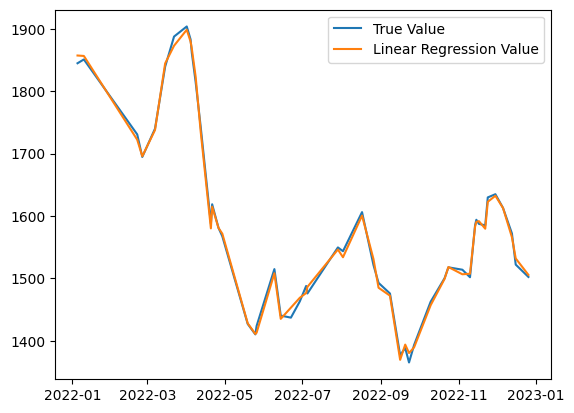

In [62]:
#1) Linear Regression
import sklearn
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

preds_lr = model_lr.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds_lr)),2)))
score_lr = model_lr.score(X_test,y_test)
print("Root mean Square: ",rms)
print("Score: ",score_lr)
preds_lr_df = pd.DataFrame(preds_lr)
preds_lr_df.index = y_test.index

plt.plot(y_test.sort_values("DATE") , label='True Value')
plt.plot(preds_lr_df.sort_values("DATE") , label='Linear Regression Value')
plt.legend()
plt.show()


In [63]:
#2) Support Vector Machines
import sklearn
model_svc = SVC(kernel='linear', C=0.025)

target_svc = np.where(data['CLOSE '].shift(-1) > data['CLOSE '], 1, 0)
svc_train = target_svc[:198]
svc_test = target_svc[198:]


model_svc.fit(X_train,svc_train)

preds_svc = model_svc.predict(X_test)

score_svc = model_svc.score(X_test,svc_test)

accuracy_svc = sklearn.metrics.accuracy_score(svc_train, model_svc.predict(X_train))
print("Score: ",score_svc)
preds_svc_df = pd.DataFrame(preds_svc)
preds_svc_df.index = y_test.index
print("Accuracy Ratio: ",accuracy_svc);

Score:  0.5
Accuracy Ratio:  0.5151515151515151


In [64]:
#3) KNN
knn = KNeighborsClassifier()
target_knn = np.where(data['CLOSE '].shift(-1) > data['CLOSE '], 1, 0)
knn_train = target_knn[:198]
knn_test = target_knn[198:]

knn.fit(X_train,knn_train)
preds_knn = knn.predict(X_test)

score_knn = knn.score(X_test,knn_test)
print("Score: ",score_knn)
accuracy_knn = sklearn.metrics.accuracy_score(knn_train, knn.predict(X_train))
print("Accuracy Ratio: ",accuracy_knn);

Score:  0.38
Accuracy Ratio:  0.7272727272727273


Score:  0.36
Accuracy Ratio:  0.7272727272727273


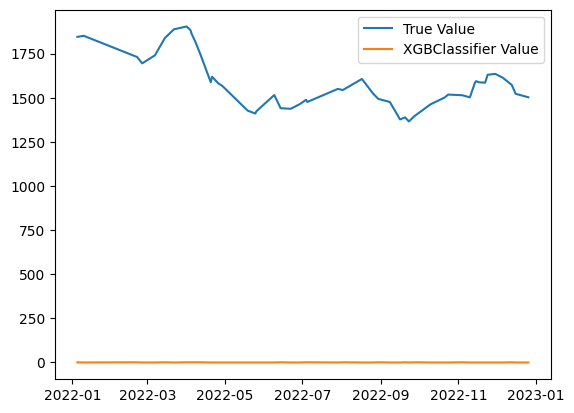

In [65]:
#4)  XGBClassifier()
model_xg = XGBClassifier()

target_xg = np.where(data['CLOSE '].shift(-1) > data['CLOSE '], 1, 0)
xg_train = target_xg[:198]
xg_test = target_xg[198:]

model_xg.fit(X_train,xg_train)

preds_xg = model_xg.predict(X_test)

score_xg = model_xg.score(X_test,xg_test)

print("Score: ",score_xg)

accuracy_xg = sklearn.metrics.accuracy_score(xg_train, knn.predict(X_train))
print("Accuracy Ratio: ",accuracy_xg);
preds_xg_df = pd.DataFrame(preds_xg)
preds_xg_df.index = y_test.index

plt.plot(y_test.sort_values("DATE") , label='True Value')
plt.plot(preds_xg_df.sort_values("DATE") , label='XGBClassifier Value')
plt.legend()
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 5, 50)             10400     
                                                                 
 dropout_4 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_4 (Dense)             (None, 2)                 102       
                                                                 
Total params: 30702 (119.93 KB)
Trainable params: 30702 (119.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/80
7/7 [==============================] - 5s 197ms/step - loss: 2564127.7500 - mean_absolute_error: 1594.4495 - val_loss: 2535180.5000 - val

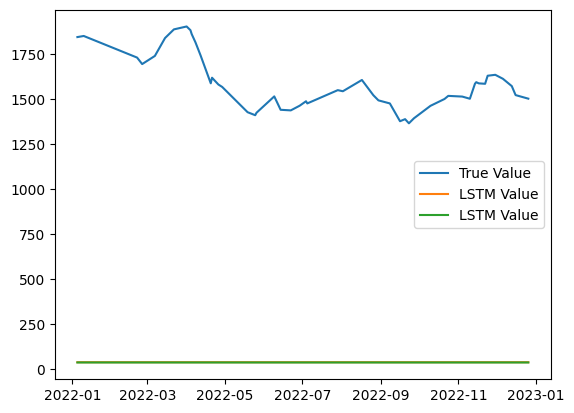

In [66]:
#5) LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1],1)))

model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(units=50))

model_lstm.add(Dense(2))

model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model_lstm.summary()

model_lstm.fit(X_train, y_train, epochs=80,validation_data=(X_test, y_test), verbose=1)
test_predicted = model_lstm.predict(X_test)

preds_lstm_df = pd.DataFrame(test_predicted)
preds_lstm_df.index = y_test.index
plt.plot(y_test.sort_values("DATE") , label='True Value')
plt.plot(preds_lstm_df.sort_values("DATE") , label='LSTM Value')
plt.legend()
plt.show()


